# Python `tspart` Module Usage Example

In [1]:
import tspart
from IPython.display import display

In [ ]:
email = input("Please enter your email address (for sending requests to the Neos online solver):").strip()

Import the image and get it's size.

In [2]:
img = tspart.load_image_as_array("tests\\bowser.jpg")
size = tspart.image_array_size(img)

Split into CMYK channels.

In [3]:
cmyk = tspart.split_cmyk(img)

Stipple the images.

In [ ]:
cmyk_points = tspart.voronoi.stipple_image_multi(cmyk, points=500)

Solve the TSP problems with a free online solver.

This will take a long time.

In [ ]:
neos = tspart.neos.get_client()
jobs = tspart.neos.submit_solves(neos, email, cmyk_points)
solves = tspart.neos.get_solves_blocking(neos, jobs)

Map the indices back to actual points.

In [ ]:
cmyk_routes = tspart.map_points_to_route_multi(cmyk_points, solves)

Save the routes locally for later use.

In [ ]:
tspart.save_routes("tests\\bowser_tsp.json", cmyk_routes, size)

Draw a bitmap image.

In [5]:
drawn_image = tspart.draw_cmyk_routes(cmyk_routes, line_width=5, size=size)

Display the image.

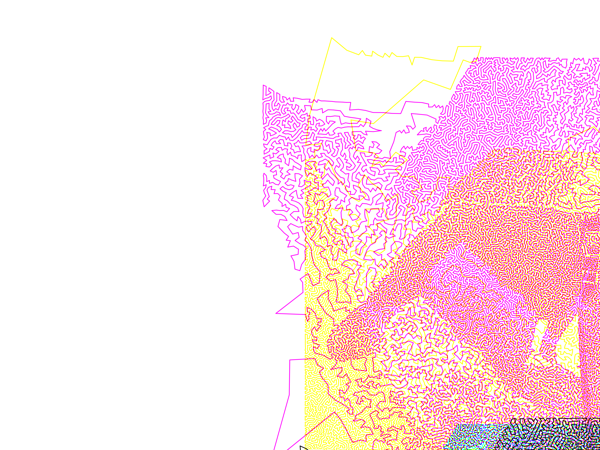

In [6]:
width = 600

ratio = size[0] / size[1]
new_size = (
    width,
    int(round(width / ratio))
)

display(drawn_image.resize(new_size))

Save the image.

In [ ]:
drawn_image.save("tests\\bowser_tsp.png")

# Tools:

Cancel Neos solves.

In [ ]:
tspart.neos.cancel_solves(neos, jobs)

Load precomputed image data from disk.

In [4]:
cmyk_routes, size = tspart.load_routes("tests\\bowser_25000.json")